### Introduction to Transfer Learning

- Convolutional NN Review
- Image Augmentation
- Using pre-built networks

In [1]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential

In [2]:
!ls data

ex1.txt          ex3.txt          hotdog-nothotdog
ex2.txt          frankenstein.txt


In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen = ImageDataGenerator()

In [11]:
train_data = train_gen.flow_from_directory('data/hotdog-nothotdog/train/')

Found 3000 images belonging to 2 classes.


In [45]:
model_1 = Sequential()
model_1.add(Flatten())
model_1.add(Dense(100, activation = 'relu'))
model_1.add(Dense(2, activation = 'softmax'))

In [46]:
model_1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [47]:
model_1.fit(train_data, y_train, validation_data = (val_data, y_test), epochs = 10)

ValueError: `y` argument is not supported when using `keras.utils.Sequence` as input.

In [16]:
import matplotlib.pyplot as plt

In [19]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation = 'relu'))
model_2.add(MaxPool2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(100, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [20]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [21]:
model_2.fit(train_data)

94/94 [==============================] - 38s 400ms/step - loss: 373.1593 - acc: 0.5000


### Transfer Learning

In [22]:
from keras.applications import InceptionV3

In [23]:
conv_base = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (299, 299, 3))

In [25]:
#conv_base.summary()

In [26]:
train_gen = ImageDataGenerator(rescale = 1/255)

In [27]:
train_data = train_gen.flow_from_directory('data/hotdog-nothotdog/train/',
                                          target_size = (299, 299),
                                          batch_size = 32,
                                          class_mode = None,
                                          shuffle = False)

Found 3000 images belonging to 2 classes.


In [28]:
val_data = train_gen.flow_from_directory('data/hotdog-nothotdog/test/',
                                        target_size = (299, 299),
                                        batch_size = 32,
                                        class_mode = None,
                                        shuffle = False)

Found 644 images belonging to 2 classes.


In [29]:
l_train = conv_base.predict(train_data)

In [30]:
l_test = conv_base.predict(val_data)

In [31]:
from keras.layers import GlobalAveragePooling2D

In [33]:
model_3 = Sequential()
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(2, activation = 'softmax'))

In [34]:
model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [35]:
from keras.utils import to_categorical

In [36]:
y_train = train_data.labels
y_test = val_data.labels

In [37]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [39]:
y_train = to_categorical(y_train)

In [40]:
y_test = to_categorical(y_test)

In [50]:
history = model_3.fit(l_train, y_train, validation_data=(l_test, y_test), epochs = 20)

Epoch 1/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0709 - acc: 0.9770 - val_loss: 0.0882 - val_acc: 0.9627
Epoch 2/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0673 - acc: 0.9810 - val_loss: 0.0924 - val_acc: 0.9627
Epoch 3/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0667 - acc: 0.9783 - val_loss: 0.0967 - val_acc: 0.9596
Epoch 4/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0637 - acc: 0.9783 - val_loss: 0.1125 - val_acc: 0.9612
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0598 - acc: 0.9820 - val_loss: 0.0957 - val_acc: 0.9581
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0572 - acc: 0.9827 - val_loss: 0.0983 - val_acc: 0.9612
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0526 - acc: 0.9857 - val_loss: 0.0972 - val_acc: 0.9596
Epoch 8/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0549 - acc: 0.98

In [51]:
import matplotlib.pyplot as plt

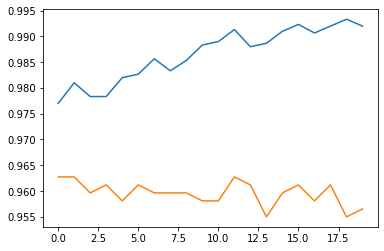

In [52]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [62]:
toy_model = Sequential()
toy_model.add(Dense(2, activation = 'relu', input_shape = (2,)))

In [63]:
toy_model.compile(loss = 'bce', metrics = ['acc'])

In [64]:
toy_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [65]:
from keras.utils import model_to_dot, plot_model

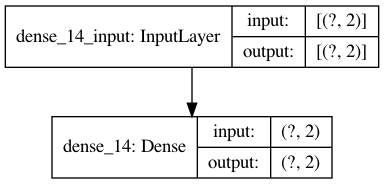

In [68]:
plot_model(toy_model, show_shapes=True)

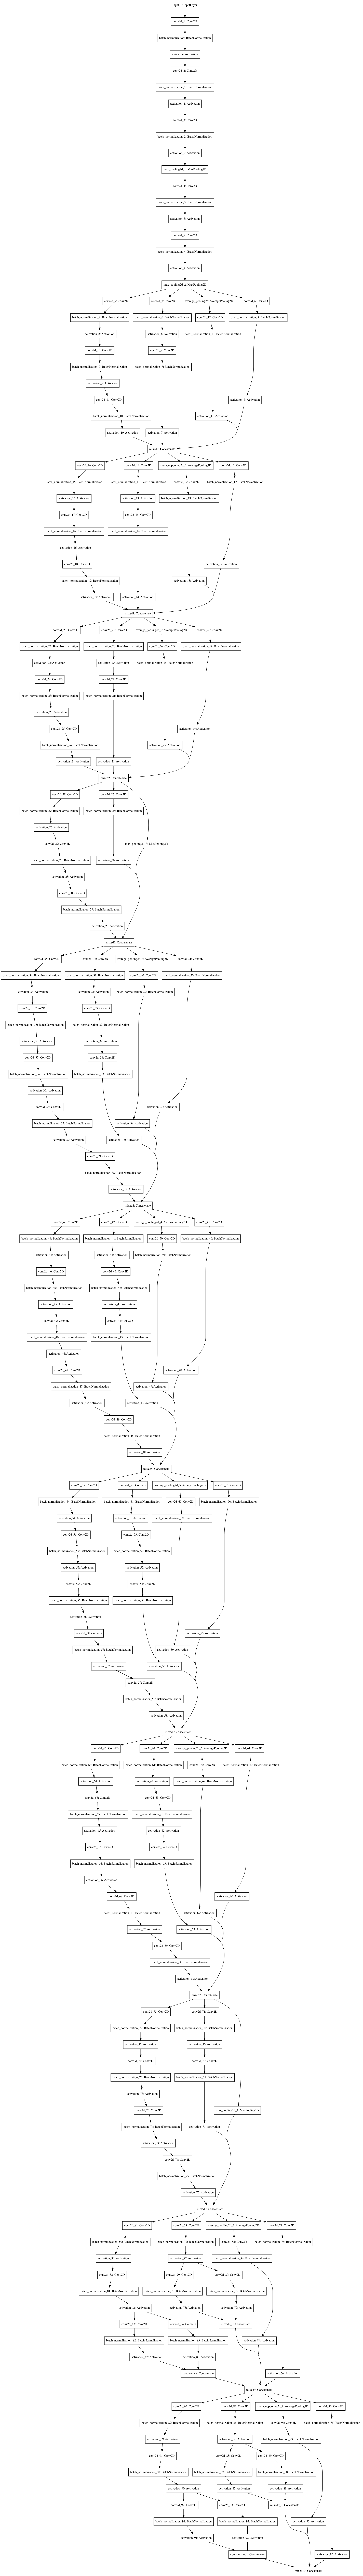

In [69]:
plot_model(conv_base)

In [ ]:
#pytorch
#deep reinforcement learning
#text and sequence with ANN